In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Churn Modeling.csv")
data.head()                       

# Exited is our dependent variable

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
# There are 10000 Rows and 14 Columns.
data.shape

(10000, 14)

In [5]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.sample(10)
#random rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1521,1522,15591130,Medvedev,507,Spain,Female,29,6,0.00,2,0,1,94780.90,0
3139,3140,15736228,Chambers,645,France,Female,40,3,129596.77,1,1,1,103232.60,0
6816,6817,15662243,Taylor,559,France,Male,50,5,162702.35,1,0,0,150548.50,1
8100,8101,15631217,Young,663,France,Male,40,6,156218.19,1,0,1,33607.72,0
1509,1510,15638149,Rowley,528,France,Male,37,6,103772.45,1,1,0,197111.99,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
5379,5380,15730796,Barker,627,France,Female,21,7,98993.02,1,1,1,169156.64,0
2773,2774,15610765,Onwumelu,559,France,Male,29,1,0.00,2,0,0,155639.76,0
1335,1336,15576683,Yin,568,Spain,Female,43,9,0.00,1,1,0,125870.79,1
8672,8673,15586848,Rose,706,France,Male,38,1,0.00,2,1,0,122379.54,0


In [8]:
# Checking null values in the dataset if there we have to drop it.
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()
# sum of true values
# In our dataset there is no missing value

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# Getting overall Statistics about the dataset
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
# to check Statistic for numareical columns or Catagorical columns
data.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [12]:
# Dropping Irrelevent Features
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
# we have no effect on our prediction
data=data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# Encoding categorical data
data["Geography"].unique()

# ml model understand only numerical values so we have to convert thes categorical into numbers
# france to 0 , Spain to 1 , germany to 2

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
# than we created a dummy variable
# to convert categorical into numerical .
# one or more categorical columns in a dataframe.
data=pd.get_dummies(data,drop_first=True)

In [16]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [17]:
# checking distribution of target varibale

data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

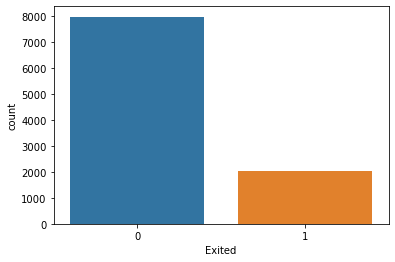

In [18]:
sns.countplot(data["Exited"])

# 0 shows that there are large numbers of customer which are not going to exict
# 1 shows the number of customer excited
# the dataset is imbalance so the target class has uneven distribution 
# o has very high number of distribution than 1

In [19]:
# Seprating dependent and independent variables
# storing independent varible in x
# In X the dataset drop the Exited.
# and this our independent variable
X=data.drop("Exited",axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [20]:
# exited value will be showed
# and this is our target
y=data["Exited"]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

<AxesSubplot:>

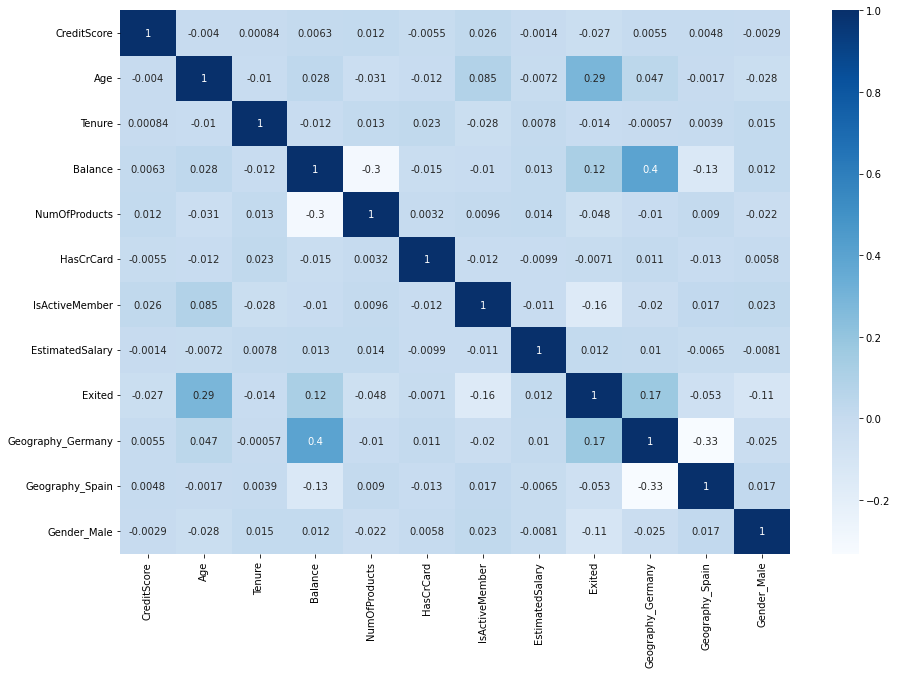

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

<AxesSubplot:>

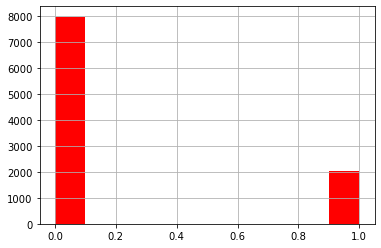

In [22]:
data['Exited'].hist(color="red")

<AxesSubplot:xlabel='Age', ylabel='Density'>

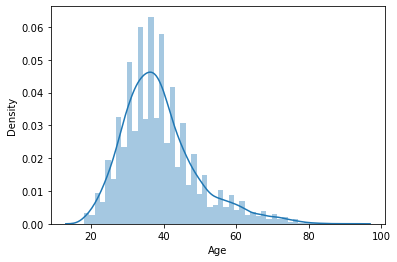

In [23]:
sns.distplot(data['Age'])

In [24]:
# Handling Imbalanced Data

from imblearn.over_sampling import SMOTE

In [25]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [26]:
# So now we have even distribution for minority class and majority class
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [27]:
# Splitting data into Train set & Test set
# Dividing original Dataset into Train & Test split

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [29]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [30]:
X_train

array([[-0.04582148,  0.20996138, -1.40078384, ..., -0.58012978,
        -0.45975218, -0.84442663],
       [ 1.10513606,  0.10948403, -1.40078384, ..., -0.58012978,
        -0.45975218,  1.1842355 ],
       [ 0.11860103, -0.29242537,  0.80856139, ...,  1.72375221,
        -0.45975218, -0.84442663],
       ...,
       [ 0.20629303,  0.20996138,  1.1767856 , ..., -0.58012978,
        -0.45975218,  1.1842355 ],
       [-0.17735949,  1.4156896 , -0.29611122, ..., -0.58012978,
        -0.45975218, -0.84442663],
       [ 0.53513804,  1.01378019, -1.40078384, ...,  1.72375221,
        -0.45975218,  1.1842355 ]])

In [31]:
X_test

array([[-1.24062503, -1.19672153,  0.07211298, ..., -0.58012978,
        -0.45975218, -0.84442663],
       [-0.4623585 ,  0.00900668, -0.29611122, ...,  1.72375221,
        -0.45975218, -0.84442663],
       [ 0.34879253, -0.99576683,  1.5450098 , ..., -0.58012978,
         2.17508486, -0.84442663],
       ...,
       [ 0.10763953, -0.29242537,  0.44033719, ..., -0.58012978,
        -0.45975218, -0.84442663],
       [ 1.11609756,  1.11425754,  0.44033719, ...,  1.72375221,
        -0.45975218, -0.84442663],
       [-2.55600508,  1.2147349 , -1.40078384, ..., -0.58012978,
         2.17508486, -0.84442663]])

In [32]:
y_train

13555    1
1665     0
14878    1
7471     0
2582     0
        ..
13418    1
5390     1
860      1
15795    1
7270     0
Name: Exited, Length: 12740, dtype: int64

In [33]:
y_test

6126     0
7093     1
1659     0
15727    1
9682     0
        ..
11031    1
9747     1
5912     0
2879     1
14259    1
Name: Exited, Length: 3186, dtype: int64

In [34]:
# Logistic Regression


from sklearn.linear_model import LogisticRegression

# In this we have to pass actual values and predicted values.
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

In [35]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred1=log.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred1)

0.7909604519774012

In [38]:
precision_score(y_test,y_pred1)

0.7732593961799138

In [39]:
recall_score(y_test,y_pred1)

0.8081133290405667

In [40]:
f1_score(y_test,y_pred1)

0.7903022670025188

In [41]:
# SVC

from sklearn import svm

svm=svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [42]:
y_pred2=svm.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred2)

0.8383553044569994

In [44]:
precision_score(y_test,y_pred2)

0.8280657395701644

In [45]:
recall_score(y_test,y_pred2)

0.8435286542176432

In [46]:
f1_score(y_test,y_pred2)

0.835725677830941

In [47]:
# KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred3=knn.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred3)

0.8223477715003139

In [50]:
precision_score(y_test,y_pred3)

0.803318992009834

In [51]:
recall_score(y_test,y_pred3)

0.8415969092079846

In [52]:
f1_score(y_test,y_pred3)

0.8220125786163521

In [53]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred4=dt.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred4)

0.7969240426867545

In [56]:
precision_score(y_test,y_pred4)

0.774878640776699

In [57]:
recall_score(y_test,y_pred4)

0.8222794591113973

In [58]:
f1_score(y_test,y_pred4)

0.7978756638550453

In [59]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
y_pred5=rf.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred5)

0.8662900188323918

In [62]:
precision_score(y_test,y_pred5)

0.8532915360501567

In [63]:
recall_score(y_test,y_pred5)

0.8763683193818416

In [64]:
f1_score(y_test,y_pred5)

0.8646759847522235

In [65]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [66]:
y_pred6=gbc.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred6)

0.8380414312617702

In [68]:
precision_score(y_test,y_pred6)

0.8330122029543995

In [69]:
recall_score(y_test,y_pred6)

0.8351577591757888

In [70]:
f1_score(y_test,y_pred6)

0.8340836012861736

In [71]:
final_data=pd.DataFrame({"Model":["LR","SVC","KNN","DT","RF","GBC"],
                        "ACC":[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

In [72]:
final_data

,Model,ACC
0,LR,0.790960
1,SVC,0.838355
2,KNN,0.822348
3,DT,0.796924
4,RF,0.866290
5,GBC,0.838041


<AxesSubplot:xlabel='Model', ylabel='ACC'>

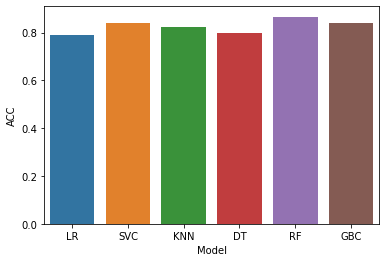

In [73]:
sns.barplot(final_data["Model"],final_data["ACC"])

In [74]:
final_data=pd.DataFrame({"Model":["LR","SVC","KNN","DT","RF","GBC"],
                        "PRE":[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4),
                              precision_score(y_test,y_pred5),
                              precision_score(y_test,y_pred6)]})

In [75]:
final_data

,Model,PRE
0,LR,0.773259
1,SVC,0.828066
2,KNN,0.803319
3,DT,0.774879
4,RF,0.853292
5,GBC,0.833012


<AxesSubplot:xlabel='Model', ylabel='PRE'>

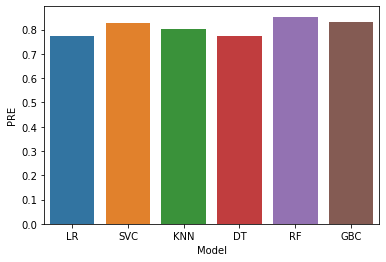

In [76]:
sns.barplot(final_data["Model"],final_data["PRE"])

In [77]:
final_data=pd.DataFrame({"Model":["LR","SVC","KNN","DT","RF","GBC"],
                        "RC":[recall_score(y_test,y_pred1),
                              recall_score(y_test,y_pred2),
                              recall_score(y_test,y_pred3),
                              recall_score(y_test,y_pred4),
                              recall_score(y_test,y_pred5),
                              recall_score(y_test,y_pred6)]})

In [78]:
final_data

,Model,RC
0,LR,0.808113
1,SVC,0.843529
2,KNN,0.841597
3,DT,0.822279
4,RF,0.876368
5,GBC,0.835158


<AxesSubplot:xlabel='Model', ylabel='RC'>

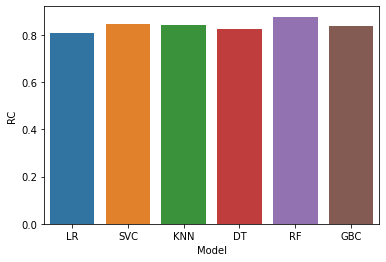

In [79]:
sns.barplot(final_data["Model"],final_data["RC"])

In [80]:
final_data=pd.DataFrame({"Model":["LR","SVC","KNN","DT","RF","GBC"],
                        "F1":[f1_score(y_test,y_pred1),
                              f1_score(y_test,y_pred2),
                              f1_score(y_test,y_pred3),
                              f1_score(y_test,y_pred4),
                              f1_score(y_test,y_pred5),
                              f1_score(y_test,y_pred6)]})

In [81]:
final_data

,Model,F1
0,LR,0.790302
1,SVC,0.835726
2,KNN,0.822013
3,DT,0.797876
4,RF,0.864676
5,GBC,0.834084


<AxesSubplot:xlabel='Model', ylabel='F1'>

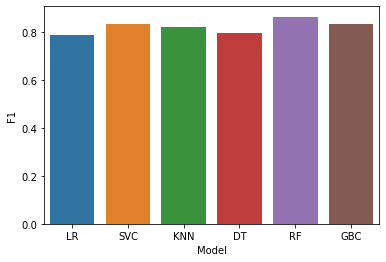

In [82]:
sns.barplot(final_data["Model"],final_data["F1"])

In [83]:
# Save The Model

X_res=sc.fit_transform(X_res)

In [84]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [85]:
import joblib

In [86]:
joblib.dump(rf,"churn_predict_model")

['churn_predict_model']

In [87]:
model=joblib.load("churn_predict_model")

In [88]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [89]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [90]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

# IN this customer left the bank.

array([1], dtype=int64)

In [91]:
model.predict([[608,41,2,83807.86,1,0,1,112542.58,0,1,0]])

# In this prediction customer is not leaving the bank.

array([0], dtype=int64)